In [28]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Getting input data

In [29]:
import gzip, _pickle, numpy as np
#num_classes = 10
img_rows, img_cols = 42, 28

def get_data(path_to_data_dir, use_mini_dataset):
    if use_mini_dataset:
        exten = '_mini'
    else:
        exten = ''
    f = gzip.open(path_to_data_dir + 'train_multi_digit' + exten + '.pkl.gz', 'rb')
    X_train = _pickle.load(f, encoding='latin1')
    f.close()
    X_train =  np.reshape(X_train, (len(X_train), 1, img_rows, img_cols))
    f = gzip.open(path_to_data_dir + 'test_multi_digit' + exten +'.pkl.gz', 'rb')
    X_test = _pickle.load(f, encoding='latin1')
    f.close()
    X_test =  np.reshape(X_test, (len(X_test),1, img_rows, img_cols))
    f = gzip.open(path_to_data_dir + 'train_labels' + exten +'.txt.gz', 'rb')
    y_train = np.loadtxt(f)
    f.close()
    f = gzip.open(path_to_data_dir +'test_labels' + exten + '.txt.gz', 'rb')
    y_test = np.loadtxt(f)
    f.close()
    return X_train, y_train, X_test, y_test

In [30]:
path_to_data_dir = '../Datasets/'
use_mini_dataset = True
X_train, y_train, X_test, y_test = get_data(path_to_data_dir, use_mini_dataset)

In [31]:
y_train = y_train.astype('int64').T
y_test = y_test.astype('int64').T

In [32]:
def plot_example(X, y):
    """Plot the first 5 images and their labels in a row."""
    fig, axs = plt.subplots(1, 5, figsize=(12,4))
    for ix, ax in enumerate(axs):
        ax.imshow(X[ix].squeeze())
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title('%d %d' % (y[0,ix], y[1,ix]))


IndexError: index 2 is out of bounds for axis 1 with size 2

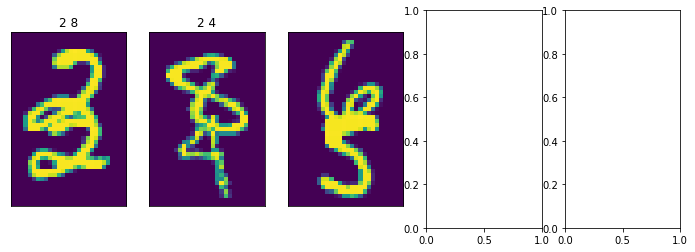

In [33]:
plot_example(X_train, y_train)

## Building Convolutional Model

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class Flatten(nn.Module):
    """A custom layer that views an input as 1D."""
    
    def forward(self, input):
        return input.view(input.size(0), -1)

In [ ]:
class CNN(nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.pool1 = nn.MaxPool2d((2, 2))
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.pool2 = nn.MaxPool2d((2, 2))
        self.flatten = Flatten()
        self.fc1 = nn.Linear(2880, 64)
        self.drop1 = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(64, 10)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.drop1(x)
        out_first_digit = self.fc2(x)
        out_second_digit = self.fc3(x)

        return out_first_digit, out_second_digit

In [ ]:
from skorch import NeuralNetClassifier
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
model_params = pd.DataFrame({
    'Batch Size' : [128],
    'Conv Size' : [5],
    'Dropout Rate' : [0.5],
    'Act Func' : ['ReLU'],
    'Linear Size' : [64],
    'Linear Act' : ['None'],
    'Conv Layers' : [2]}
)

In [ ]:
torch.manual_seed(0)

net = NeuralNetClassifier(
    CNN,
    max_epochs=5,
    lr=0.1,
    device=device,
)

In [ ]:
net.fit(X_train, y_train);

In [ ]:
print(X_train.shape, y_train.shape)